In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score

In [2]:
df = pd.read_csv("log_data.csv")
df

,x1,x2,y
0,2,1,1
1,1,2,1
2,6,2,0
3,6,4,0
4,4,1,1
5,4,6,0
6,5,6,0
7,3,4,1
8,5,5,0
9,6,5,0


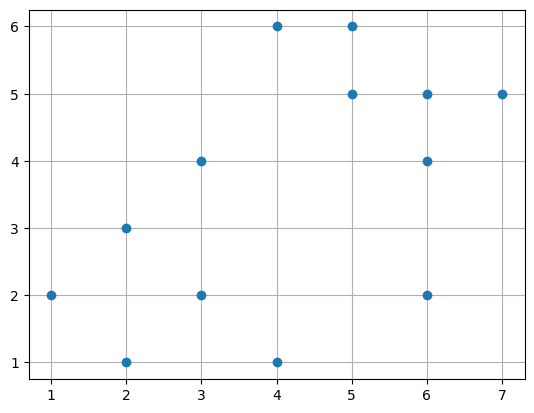

In [3]:
plt.scatter(df["x1"], df["x2"], zorder=3)
# plt.scatter(df["x2"], df["y"], zorder=3)
plt.grid()

In [4]:
model = LogisticRegression().fit(df[["x2", "x1"]], df["y"])

In [5]:
print(
    model.coef_,
    model.intercept_
)

[[-0.74213063 -1.25142134]] [7.64214404]


In [6]:
k1 = -model.coef_[0][0] / model.coef_[0][1]
k2 = -model.intercept_ / model.coef_[0][1]
x = np.linspace(0, 8, 100)
f = k1 * x + k2

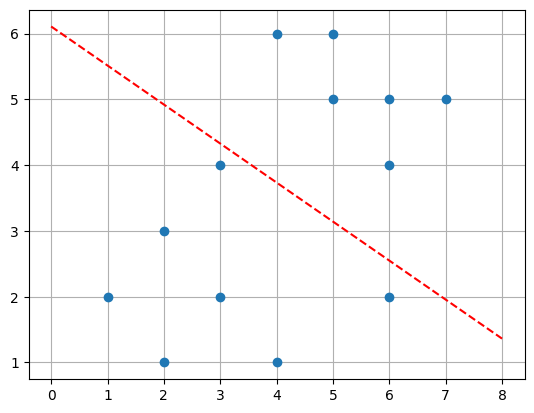

In [7]:
plt.scatter(df["x1"], df["x2"], zorder=3)
plt.plot(x, f, "r--")
plt.grid()
plt.show()

In [8]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]],
    df["Outcome"],
    test_size=.5,
    random_state=42
)

In [11]:
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

In [ ]:
model = LogisticRegression(max_iter=1000).fit(x_train, y_train)

y_pred = model.predict(x_test)

In [13]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(model.coef_, model.intercept_)

0.21354166666666666
0.04639612356147782
0.7864583333333334
0.6935483870967742
[[ 0.07630496  0.03213523 -0.01444167 -0.008044    0.00086399  0.12460006
   0.48692194  0.02454613]] [-8.91262157]
